In [1]:
import pandas as pd 
df = pd.read_csv('tmdb_cleaned_movies.csv')
print(df.head(5))

   id                             title  vote_average  vote_count  \
0   2                             Ariel         7.082         304   
1   3               Shadows in Paradise         7.302         344   
2   5                        Four Rooms         5.800        2534   
3   6                    Judgment Night         6.527         316   
4   8  Life in Loops (A Megacities RMX)         7.500          27   

  release_date     revenue  runtime      budget original_language  \
0   1988-10-21         0.0       73         0.0                fi   
1   1986-10-17         0.0       74         0.0                fi   
2   1995-12-09   4257354.0       98   4000000.0                en   
3   1993-10-15  12136938.0      109  21000000.0                en   
4   2006-01-01         0.0       80     42000.0                en   

                                            overview  popularity  \
0  After the coal mine he works at closes and his...       9.751   
1  Nikander, a rubbish collector a

In [2]:
# Import necessary libraries 
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load dataset
# Replace 'your_dataset.csv' with your dataset file
df = pd.read_csv("modelfile.csv")

In [4]:
# Step 3: Split dataset into features (X) and target labels (y)
target_column = 'high_rating'  # Replace with your target column
features = ['genres', 'cast', 'budget', 'runtime', 'popularity', 'year', 'month', 'day']  # Replace with relevant features
df['high_rating'] = df['vote_average'] >= 7  # Create binary target column if needed
X = df[features]
y = df[target_column]

In [5]:
# Step 4: Handle missing values
X = X.fillna(0)  # Replace missing values in features with 0
y = y.fillna(0)  # Replace missing values in target if any

In [6]:
# Step 5: Convert categorical features to numerical
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [7]:
# Step 6: Scale or normalize numerical features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Step 8: Train decision tree model
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [11]:
# Step 9: Predict on the test set
y_pred = model.predict(X_test)

In [12]:
# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.77
Precision: 0.55
Recall: 0.36
F1 Score: 0.44

Confusion Matrix:
[[1375  140]
 [ 311  174]]

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1515
        True       0.55      0.36      0.44       485

    accuracy                           0.77      2000
   macro avg       0.68      0.63      0.65      2000
weighted avg       0.75      0.77      0.76      2000



In [13]:
# Step 11: Tune hyperparameters (optional)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


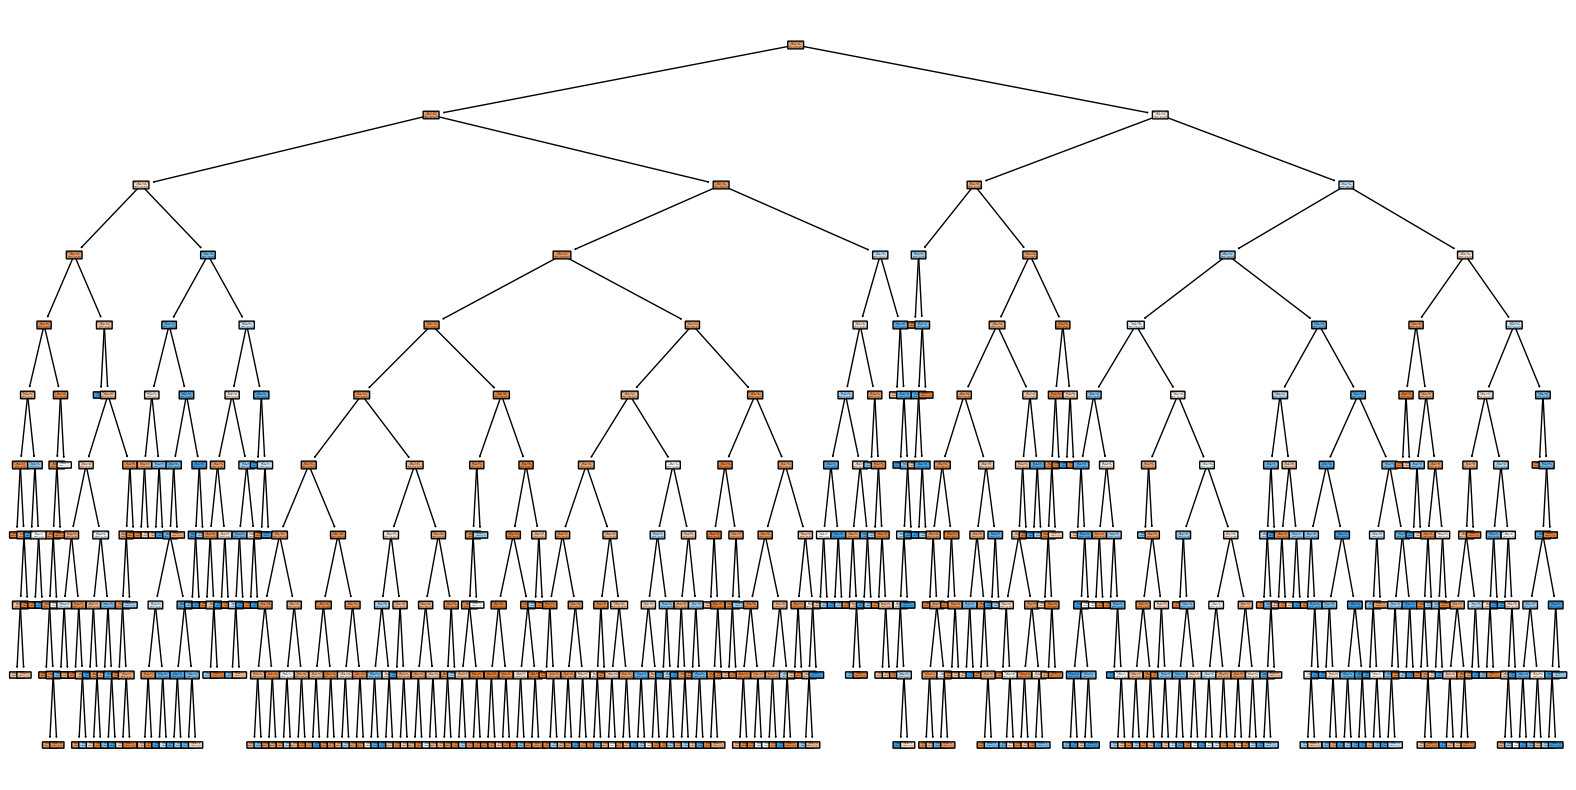

In [32]:
# Step 12: Visualize the decision tree (optional)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Low Rating', 'High Rating'], filled=True, rounded=True)
plt.show()

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("modelfile.csv")

# One-Hot Encoding for the 'genres' column (if it's a comma-separated list)
df_genres_encoded = df['genres'].str.get_dummies(sep=',')  # Create binary columns for genres
df = pd.concat([df, df_genres_encoded], axis=1)  # Add the one-hot encoded columns to the original df

# Label Encoding for 'cast' (if needed, you can adjust depending on your dataset)
label_encoder = LabelEncoder()
df['cast_encoded'] = label_encoder.fit_transform(df['cast'].astype(str))

# Fill missing values for numerical columns
df['budget'] = df['budget'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)

# Create the target column based on 'vote_average' (assuming you want a binary target)
df['high_rating'] = df['vote_average'] >= 7  # 1 for high rating, 0 for low rating

# Select features and target column
features = ['budget', 'runtime', 'popularity', 'year', 'month', 'day'] + list(df_genres_encoded.columns) + ['cast_encoded']
X = df[features]
y = df['high_rating']

# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Recommendation function
def recommend_movies_decision_tree(movie_title, data, model, top_k=5):
    """
    Recommend movies using the Decision Tree Classifier.

    :param movie_title: Title of the movie to base recommendations on.
    :param data: The original dataset containing movie titles and features.
    :param model: Trained Decision Tree Classifier.
    :param top_k: Number of recommendations to return.
    :return: List of recommended movies.
    """
    # Check if the movie exists in the dataset
    if movie_title not in data['title'].values:
        return f"Movie '{movie_title}' not found in the dataset."

    # Get the feature vector for the movie
    movie_index = data[data['title'] == movie_title].index[0]
    movie_features = data.iloc[movie_index][['budget', 'runtime', 'popularity', 'year', 'month', 'day'] + list(df_genres_encoded.columns) + ['cast_encoded']]

    # Reshape to 2D array for prediction
    movie_features = movie_features.values.reshape(1, -1)

    # Predict using the Decision Tree model
    predicted_label = model.predict(movie_features)[0]

    # Find movies with the same predicted label
    similar_movies = data[data['high_rating'] == predicted_label]['title']

    # Exclude the input movie and get top K recommendations
    recommendations = similar_movies[similar_movies != movie_title].head(top_k).tolist()

    return recommendations

# Example Usage
movie_title = "Iron Man"  # Replace with the movie you want recommendations for
recommendations = recommend_movies_decision_tree(movie_title, df, model, top_k=5)

print(f"Recommendations for '{movie_title}':")
for i, rec_title in enumerate(recommendations, 1):
    print(f"{i}. {rec_title}")

Recommendations for 'Iron Man':
1. Ariel
2. Shadows in Paradise
3. Life in Loops (A Megacities RMX)
4. Sunday in August
5. Star Wars


D:\Disk D Downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
